In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
import numpy as np
X_test = np.load("../../../data/X_test_DOF.npy")
X_test_videos = np.load("../../../data/X_test_videos_DOF.npy")
Y_test = np.load("../../../data/Y_test_DOF.npy")

X_train = np.load("../../../data/X_train_DOF.npy")
X_train_videos = np.load("../../../data/X_train_videos_DOF.npy")
Y_train = np.load("../../../data/Y_train_DOF.npy")

In [3]:
from scipy.misc import imread , imsave , imresize
def rgb2gray(rgb):
    return np.dot(rgb[...,:3] , [0.299 , 0.587 , 0.144])
def img_resize(img,t):
    return imresize(img, (img.shape[0] / t , img.shape[1] / t))

In [ ]:
X_train = np.array([img_resize(img, 2) for img in X_train])
X_test = np.array([img_resize(img, 2) for img in X_test])

In [ ]:
X_train = np.array([rgb2gray(img) for img in X_train])
X_test = np.array([rgb2gray(img) for img in X_test])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#X_train = np.array([img_resize(img, 2) for img in X_train])
#X_test = np.array([img_resize(img, 2) for img in X_test])
#X_train = np.array([img.reshape(img.shape[0]*img.shape[1]) for img in X_train])
#X_test = np.array([img.reshape(img.shape[0]*img.shape[1]) for img in X_test])
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [ ]:
for estimators in range(1,200,10):
    for leafs in range(1,30,2):
        clf = RandomForestClassifier(n_estimators=estimators, min_samples_leaf=leafs)
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        correct = sum([int(y_pred[i] == Y_test[i]) for i in range(len(Y_test))])
        total = len(Y_test)
        print correct/float(total) , estimators , leafs

In [5]:
y_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

In [ ]:
correct = sum([int(y_pred[i] == Y_test[i]) for i in range(len(Y_test))])

In [ ]:
total = len(Y_test)

In [ ]:
correct/float(total)

In [ ]:
RandomForestClassifier?

In [6]:
estimators = 100
leafs = 25
clf = RandomForestClassifier(n_estimators=estimators, min_samples_leaf=leafs)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
correct = sum([int(y_pred[i] == Y_test[i]) for i in range(len(Y_test))])
total = len(Y_test)
print correct/float(total) , estimators , leafs

0.851428571429 100 25


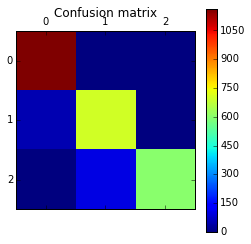

In [29]:
from matplotlib.pylab import *
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
matshow(confusion_matrix)
title("Confusion matrix")
colorbar();

In [28]:
predictions = np.array(np.zeros(shape = (3) , dtype = 'uint8'))
start = 0
for index in range(len(y_pred)):
    predictions[y_pred[index]] += 1
    if index + 1 < len(y_pred):
        if X_test_videos[index] != X_test_videos[index + 1]:
            y_pred[start : index + 1] = np.argmax(predictions)
            start = index + 1
            predictions = np.zeros(shape = (3) , dtype = 'uint8')
y_pred[start : index] = np.argmax(predictions)

In [30]:
confusion_matrix

array([[1164,    0,    0],
       [  51,  704,    0],
       [   0,  102,  604]])

In [31]:
np.sum(confusion_matrix, axis=1)

array([1164,  755,  706])

In [32]:
sum (Y_test == 0)

1164

In [33]:
confusion_matrix /  np.sum(confusion_matrix, axis=1).astype('float')

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.04381443,  0.93245033,  0.        ],
       [ 0.        ,  0.13509934,  0.85552408]])

In [23]:
X_test_videos[0]

190

In [24]:
sum(X_test_videos == 190)

51

In [25]:
Y_test[0:52]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=uint8)

In [26]:
y_pred[0:52]

array([1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0], dtype=uint8)